In [ ]:
"""
Purpose: To Compare how the new rules do when proofreading a cell

"""

# The procedure when proofreadig the cell

In [ ]:
"""
1) Downloads the neuorn
2) Apply the New Proofreading rules to the cell (that just creates a new limb brnach dict)
3) Do the synapse Filtering
4) Get the synapses that should belong
5) Compare and give a score

"""

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-20 02:15:04,861 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:04,863 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:04,864 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:04,867 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-20 02:15:04,869 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:04,882 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-20 02:15:05,314 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:05,317 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:05,318 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:05,319 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:05,320 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:05,320 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:05,321 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:05,322 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:05,765 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-20 02:16:58,830 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:16:58,833 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:16:58,834 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:16:58,838 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:16:59,366 - settings - Setting enable_python_native_blobs to True


In [7]:
import validation_utils as vu

# Downloading the neuron and the synapse information

In [6]:
minnie.AutoProofreadValidationBorderNeurons() & "segment_id = 864691136311791677"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,decomposition
864691136311791677,0,0.25,30.00,5,0,0,3,=BLOB=


In [8]:
segment_id = 864691136311791677

In [9]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [10]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False)

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 176
n_errored_syn_ids_presyn = 270
n_valid_syn_ids_postsyn = 6896
n_errored_syn_ids_postsyn = 117


In [11]:
validation_df

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,200140198,presyn,True,803444,792224,978600,True,TP,864691136311791677,864691135497743635,611655.979662
1,200140435,presyn,True,804792,791640,974480,True,TP,864691136311791677,864691135497743635,608971.709451
2,204085515,presyn,True,808960,789816,970560,True,TP,864691136311791677,864691135497743635,603435.856913
3,210185918,presyn,True,822176,785808,944960,True,TP,864691136311791677,864691135497743635,582923.562742
4,210282162,presyn,True,819760,788240,961080,True,TP,864691136311791677,864691135497743635,590612.596412
...,...,...,...,...,...,...,...,...,...,...,...
7454,426556338,postsyn,False,1345416,590504,754080,True,FN,864691136311791677,864691135497743635,55499.085974
7455,439176646,postsyn,False,1386208,543936,796960,True,FN,864691136311791677,864691135497743635,57739.775407
7456,439176781,postsyn,False,1387128,545064,797120,True,FN,864691136311791677,864691135497743635,58612.885955
7457,439283160,postsyn,False,1388464,543776,799840,True,FN,864691136311791677,864691135497743635,60573.739525


# Processing the Neuron

In [14]:
ver = 0.08
nucleus_ids,nucleus_centers = du.segment_to_nuclei(segment_id,
                                                       nuclei_version=ver)
nucleus_ids

array([583848])

In [17]:
from pykdtree.kdtree import KDTree
import trimesh_utils as tu

filtered_neuron = neuron_obj
split_index = 0
winning_nucleus_id = nucleus_ids[0]

compute_synapse_to_soma_skeletal_distance = True
return_errored_synapses_ids_non_axons = True
soma_center_in_nm = False
validation=True

original_mesh = du.fetch_segment_id_mesh(segment_id)
original_mesh_kdtree = KDTree(original_mesh.triangles_center)

original_mesh_faces = tu.original_mesh_faces_map(original_mesh,
                                                    filtered_neuron.mesh,
                                                    exact_match=True,
                                                    original_mesh_kdtree=original_mesh_kdtree)

In [18]:
# getting the axon faces

import classification_utils as clu
import neuron_utils as nru

axon_limb_branch_dict = clu.axon_limb_branch_dict(filtered_neuron)

axon_skeletal_length = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                 limb_branch_dict=axon_limb_branch_dict,
                                 feature="skeletal_length")

axon_mesh_area = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                     limb_branch_dict=axon_limb_branch_dict,
                                     feature="area")

axon_face_labels = clu.axon_faces_from_labels_on_original_mesh(filtered_neuron,
                                       original_mesh=original_mesh,
                                       original_mesh_kdtree=original_mesh_kdtree,
                                        plot_axon=False,
                                       verbose=False,)

In [25]:
# doing the synapse filtering
compute_synapse_to_soma_skeletal_distance = False
import proofreading_utils as pru

(keys_to_write_without_version,
         synapse_stats,
         total_error_synapse_ids,
         
) = pru.synapse_filtering(filtered_neuron,
                split_index,
                nucleus_id=winning_nucleus_id,
                segment_id=None,
                return_synapse_filter_info = True,
                return_synapse_center_data = False,
                return_error_synapse_ids = True,
               return_valid_synapse_centers=compute_synapse_to_soma_skeletal_distance,
                return_errored_synapses_ids_non_axons=return_errored_synapses_ids_non_axons,
                mapping_threshold = 500,
                  plot_synapses=False,
                verbose = True,
                original_mesh_method = True,
                original_mesh = original_mesh,
                original_mesh_kdtree = original_mesh_kdtree,
                valid_faces_on_original_mesh=original_mesh_faces, 
                axon_faces_on_original_mesh=axon_face_labels,

                #will only apply the filter if it is excitatory
                apply_non_axon_presyn_errors=True,
                validation=validation,

                )

Apply the presyn non_error
For presyn: # valid synapses = 406, # error synapses  = 40, # error presyns = 40
For postsyn: # valid synapses = 7012, # error synapses  = 1, # error presyns = 0


In [46]:
valid_synapse_df = pru.valid_synapse_records_to_unique_synapse_df(keys_to_write_without_version)

,synapse_id,synapse_type,nucleus_id,segment_id,split_index,skeletal_distance_to_soma
0,192248410,presyn,583848,864691136311791677,0,1
1,193839101,presyn,583848,864691136311791677,0,1
2,199666779,presyn,583848,864691136311791677,0,1
3,199667343,presyn,583848,864691136311791677,0,1
4,199668240,presyn,583848,864691136311791677,0,1
...,...,...,...,...,...,...
7413,456294489,postsyn,583848,864691136311791677,0,1
7414,456294843,postsyn,583848,864691136311791677,0,1
7415,456295391,postsyn,583848,864691136311791677,0,1
7416,456295476,postsyn,583848,864691136311791677,0,1


In [49]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                    include_extension_synapse=False,
                                      valid_synapses_ids=valid_synapse_df["synapse_id"].to_list())

vu.synapse_validation_df_to_category_counts(validation_df,
                                            print_postsyn=True,
                                            print_presyn=True)
                                         

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 406
n_errored_syn_ids_presyn = 40
n_valid_syn_ids_postsyn = 7012
n_errored_syn_ids_postsyn = 1
Presyn counts:
TP:116
TN:39
FP:290
FN:1
Postsyn counts:
TP:6971
TN:0
FP:41
FN:1


{'presyn': {'TP': 116, 'TN': 39, 'FP': 290, 'FN': 1},
 'postsyn': {'TP': 6971, 'TN': 0, 'FP': 41, 'FN': 1}}

Presyn counts:
TP:116
TN:39
FP:290
FN:1


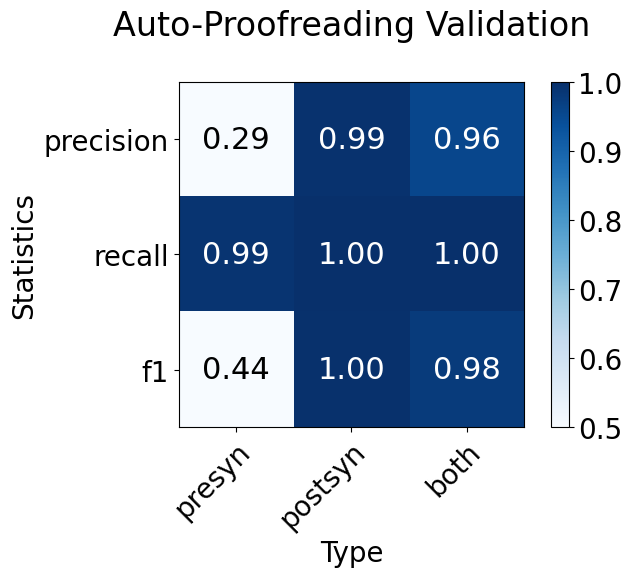

In [50]:
vu.synapse_validation_df_to_score_plot(validation_df)

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 176
n_errored_syn_ids_presyn = 270
n_valid_syn_ids_postsyn = 6896
n_errored_syn_ids_postsyn = 117
Presyn counts:
TP:115
TN:268
FP:61
FN:2
Postsyn counts:
TP:6888
TN:33
FP:8
FN:84
Presyn counts:
TP:115
TN:268
FP:61
FN:2


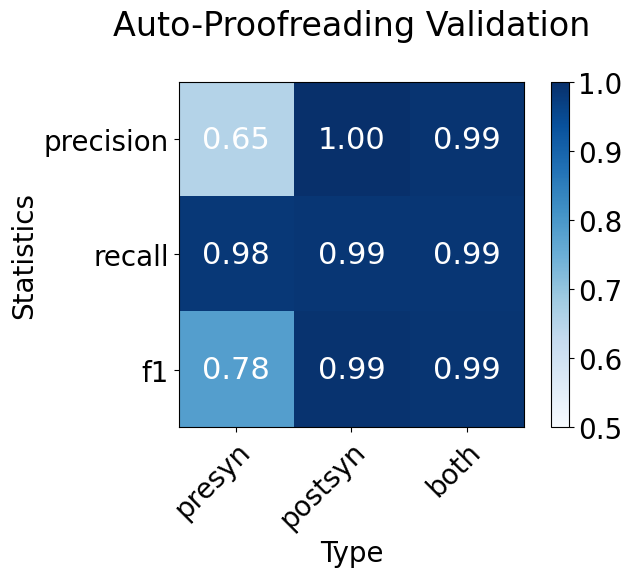

In [58]:
# if had the original
validation_df_original = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False,)
vu.synapse_validation_df_to_category_counts(validation_df_original,
                                            print_postsyn=True,
                                            print_presyn=True)
vu.synapse_validation_df_to_score_plot(validation_df_original)

# Take the Synapse Data and Convert it into form that can be processed by the validation functions